<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI-stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00


In [2]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [3]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [4]:
df = pd.read_csv(r"/content/0502_delaymax_180_300600.csv", index_col=0)
# df = pd.read_csv(r"/content/0502_delaymax_none_300600.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

Arlanda central  Barkarby    Bro  Bålsta  Farsta strand  Flemingsberg  \
300.0              0.0       0.0    0.0     0.0            0.0           0.0   
310.0              0.0       0.0    0.0     0.0            0.0           0.0   
320.0              0.0       0.0    0.0     0.0            0.0           0.0   
330.0              0.0       0.0    0.0     0.0            0.0           0.0   
340.0              0.0       0.0    0.0     0.0            0.0           0.0   
350.0              0.0       0.0    0.0     0.0            0.0           0.0   
360.0              0.0     238.0    0.0     0.0            0.0           0.0   
370.0              0.0       0.0    0.0     0.0            0.0           0.0   
380.0              0.0       0.0    0.0     0.0            0.0           0.0   
390.0              0.0       0.0    0.0     0.0            0.0           0.0   
400.0              0.0       0.0    0.0     0.0            0.0           0.0   
410.0              0.0       0.0    0.0     0.0            0.0           0.0   
420.0              0.0       0.0    0.0     0.0            0.0           0.0   
430.0              0.0       0.0    0.0     0.0            0.0        1066.0   
440.0              0.0       0.0    0.0     0.0            0.0           0.0   
450.0              0.0       0.0    0.0     0.0            0.0           0.0   
460.0              0.0       0.0    0.0     0.0            0.0         646.0   
470.0              0.0     258.0    0.0     0.0            0.0         378.0   
480.0              0.0     364.0    0.0     0.0            0.0           0.0   
490.0              0.0       0.0    0.0     0.0            0.0           0.0   
500.0            464.0       0.0    0.0     0.0            0.0           0.0   
510.0              0.0       0.0    0.0     0.0            0.0           0.0   
520.0              0.0     988.0    0.0     0.0            0.0           0.0   
530.0            649.0     434.0    0.0     0.0          267.0           0.0   
540.0              0.0       0.0  415.0     0.0            0.0           0.0   
550.0              0.0       0.0    0.0   402.0            0.0           0.0   
560.0            742.0       0.0    0.0     0.0            0.0           0.0   
570.0              0.0       0.0    0.0     0.0            0.0           0.0   
580.0              0.0       0.0    0.0     0.0            0.0           0.0   
590.0              0.0       0.0    0.0     0.0            0.0           0.0   
600.0              0.0       0.0    0.0     0.0            0.0           0.0   

       Gnesta  Gröndalsviken  Handen  Helenelund  ...  Tungelsta  Ulriksdal  \
300.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
310.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
320.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
330.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
340.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
350.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
360.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
370.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
380.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
390.0     0.0            0.0     0.0         0.0  ...      193.0        0.0   
400.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
410.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
420.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
430.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
440.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
450.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
460.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
470.0     0.0           

In [5]:
df_delay = df
df_delay.columns

Index(['Arlanda central', 'Barkarby', 'Bro', 'Bålsta', 'Farsta strand',
       'Flemingsberg', 'Gnesta', 'Gröndalsviken', 'Handen', 'Helenelund',
       'Hemfosa', 'Huddinge', 'Häggvik', 'Jakobsberg', 'Jordbro', 'Järna',
       'Kallhäll', 'Knivsta', 'Krigslida', 'Kungsängen', 'Märsta', 'Mölnbo',
       'Norrviken', 'Nynäsgård', 'Nynäshamn', 'Rosersberg', 'Rotebro',
       'Rönninge', 'Segersäng', 'Skogås', 'Sollentuna', 'Solna', 'Spånga',
       'Stockholm City', 'Stockholm Odenplan', 'Stockholms södra', 'Stuvsta',
       'Sundbyberg', 'Södertälje centrum', 'Södertälje hamn', 'Södertälje syd',
       'Trångsund', 'Tullinge', 'Tumba', 'Tungelsta', 'Ulriksdal',
       'Upplands Väsby', 'Uppsala C', 'Vega', 'Västerhaninge', 'Älvsjö',
       'Årstaberg', 'Ösmo', 'Östertälje'],
      dtype='object')

# PCMCI 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [6]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

/usr/local/lib/python3.11/dist-packages/tigramite/data_processing.py:308: UserWarning: In analysis mode 'single', 'data'.shape = (31, 54); is it of shape (observations, variables)?
  warnings.warn("In analysis mode 'single', 'data'.shape = ({}, {});"\


In [8]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 3 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Resulting lagged parent (super)sets:

    Variable Arlanda central has 9 link(s):
    [pc_alpha = 0.1]
        (Upplands Väsby -1): max_pval = 0.01400, |min_val| =  0.543
        (Uppsala C -1): max_pval = 0.02000, |min_val| =  0.527
        (Ulriksdal -3): max_pval = 0.04400, |min_val| =  0.466
        (Häggvik -2): max_pval = 0.06200, |min_val| =  0.436
        (Bro -2): max_pval = 0.07000, |min_val| =  0.423
        (Sollentuna -2): max_pval = 0.07000, |min_val| =  0.423
        (Bålsta -1): max_pval = 0.08600, |min_val| =  0.411
        (Farsta strand -3): max_pval = 0.08600, |min_val| =  0.411
        (Helenelund -2): max_pval = 0.09800, |min_val| =  0.405

    Variable Barkarby has 2 link(s):
    [pc_alpha = 0.05]
        (Sundbyberg -1): max_pval = 0.00000, |min_val| =  0.723
        (Stockholms södra -3): max_pval = 0.04200, |min_val| =  0.475

    Variable Bro has 5 link(s):
    [pc_alpha = 0.1]
        (Farsta strand -1): max_pval = 0.00000, |min_val| =  0.989
        (Ja

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Significant links at alpha = 0.05:

    Variable Arlanda central has 94 link(s):
        (Upplands Väsby -1): pval = 0.00000 | val =  0.873
        (Märsta -1): pval = 0.00000 | val =  0.764
        (Arlanda central -3): pval = 0.00000 | val =  0.747
        (Farsta strand  0): pval = 0.00000 | val =  0.722 | unoriented link
        (Rosersberg  0): pval = 0.00200 | val =  0.700 | unoriented link
        (Rosersberg -2): pval = 0.00200 | val =  0.697
        (Tumba -1): pval = 0.00200 | val =  0.691
        (Solna  0): pval = 0.00200 | val =  0.682 | unoriented link
        (Bro -1): pval = 0.00200 | val =  0.666
        (Hemfosa -1): pval = 0.00200 | val =  0.650
        (Segersäng -1): pval = 0.00200 | val =  0.650
        (Bro  0): pval = 0.00200 | val =  0.647 | unoriented link
        (Häggvik -2): pval = 0.00200 | val =  0.645
        (Älvsjö -3): pval = 0.00200 | val =  0.640
        (Arlanda central -2): pval = 0.00200 | val =  0.628
        (Södertälje centrum -2): pval = 

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

In [9]:
var_names = df_delay.columns
var_names

Index(['Arlanda central', 'Barkarby', 'Bro', 'Bålsta', 'Farsta strand',
       'Flemingsberg', 'Gnesta', 'Gröndalsviken', 'Handen', 'Helenelund',
       'Hemfosa', 'Huddinge', 'Häggvik', 'Jakobsberg', 'Jordbro', 'Järna',
       'Kallhäll', 'Knivsta', 'Krigslida', 'Kungsängen', 'Märsta', 'Mölnbo',
       'Norrviken', 'Nynäsgård', 'Nynäshamn', 'Rosersberg', 'Rotebro',
       'Rönninge', 'Segersäng', 'Skogås', 'Sollentuna', 'Solna', 'Spånga',
       'Stockholm City', 'Stockholm Odenplan', 'Stockholms södra', 'Stuvsta',
       'Sundbyberg', 'Södertälje centrum', 'Södertälje hamn', 'Södertälje syd',
       'Trångsund', 'Tullinge', 'Tumba', 'Tungelsta', 'Ulriksdal',
       'Upplands Väsby', 'Uppsala C', 'Vega', 'Västerhaninge', 'Älvsjö',
       'Årstaberg', 'Ösmo', 'Östertälje'],
      dtype='object')

In [10]:
train_paths = [
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Arlanda central", "Knivsta", "Uppsala C"],
    ["Södertälje centrum", "Södertälje hamn", "Östertälje", "Rönninge", "Tumba",
    "Tullinge", "Flemingsberg", "Huddinge", "Stuvsta", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Solna",
    "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken", "Rotebro",
    "Upplands Väsby", "Rosersberg", "Märsta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Jordbro", "Handen", "Vega",
    "Skogås", "Trångsund", "Farsta strand", "Älvsjö", "Årstaberg",
    "Stockholms södra", "Stockholm City", "Stockholm Odenplan", "Sundbyberg",
    "Spånga", "Barkarby", "Jakobsberg", "Kallhäll", "Kungsängen", "Bro", "Bålsta"],
    ["Södertälje centrum", "Södertälje hamn", "Södertälje syd", "Järna", "Mölnbo", "Gnesta"],
    ["Nynäshamn", "Gröndalsviken", "Nynäsgård", "Ösmo", "Segersäng", "Hemfosa",
    "Tungelsta", "Krigslida", "Västerhaninge", "Handen", "Farsta strand",
    "Älvsjö", "Årstaberg", "Stockholms södra", "Stockholm City", "Stockholm Odenplan",
    "Solna", "Ulriksdal", "Helenelund", "Sollentuna", "Häggvik", "Norrviken",
    "Rotebro", "Upplands Väsby", "Rosersberg", "Märsta"]
]
def is_later_station(train_paths, from_station, to_station):
    for path in train_paths:
        if from_station in path and to_station in path:
            if path.index(to_station) >= path.index(from_station):
                return True
    return False


p_matrix_c = results['p_matrix'].copy()
num_vars = p_matrix_c.shape[0]
tau_max_plus1 = p_matrix_c.shape[2]
count = [0] * tau_max_plus1
var_names = df_delay.columns
alpha=0.05

for lag in range(tau_max_plus1):
    for i in range(num_vars):
        for j in range(num_vars):
            source = var_names[j]
            target = var_names[i]
            if not is_later_station(train_paths, source, target):
                p_matrix_c[i,j,lag] = 1
            elif p_matrix_c[i,j,lag]<=alpha:
              count[lag] += 1

print(count)

[389, 394, 378, 356]


# 可视化部分

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

In [12]:
# 设置显著性水平
alpha_level = 0.05
# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=p_matrix_c,
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)

(<Figure size 1800x1800 with 1 Axes>, <Axes: >)

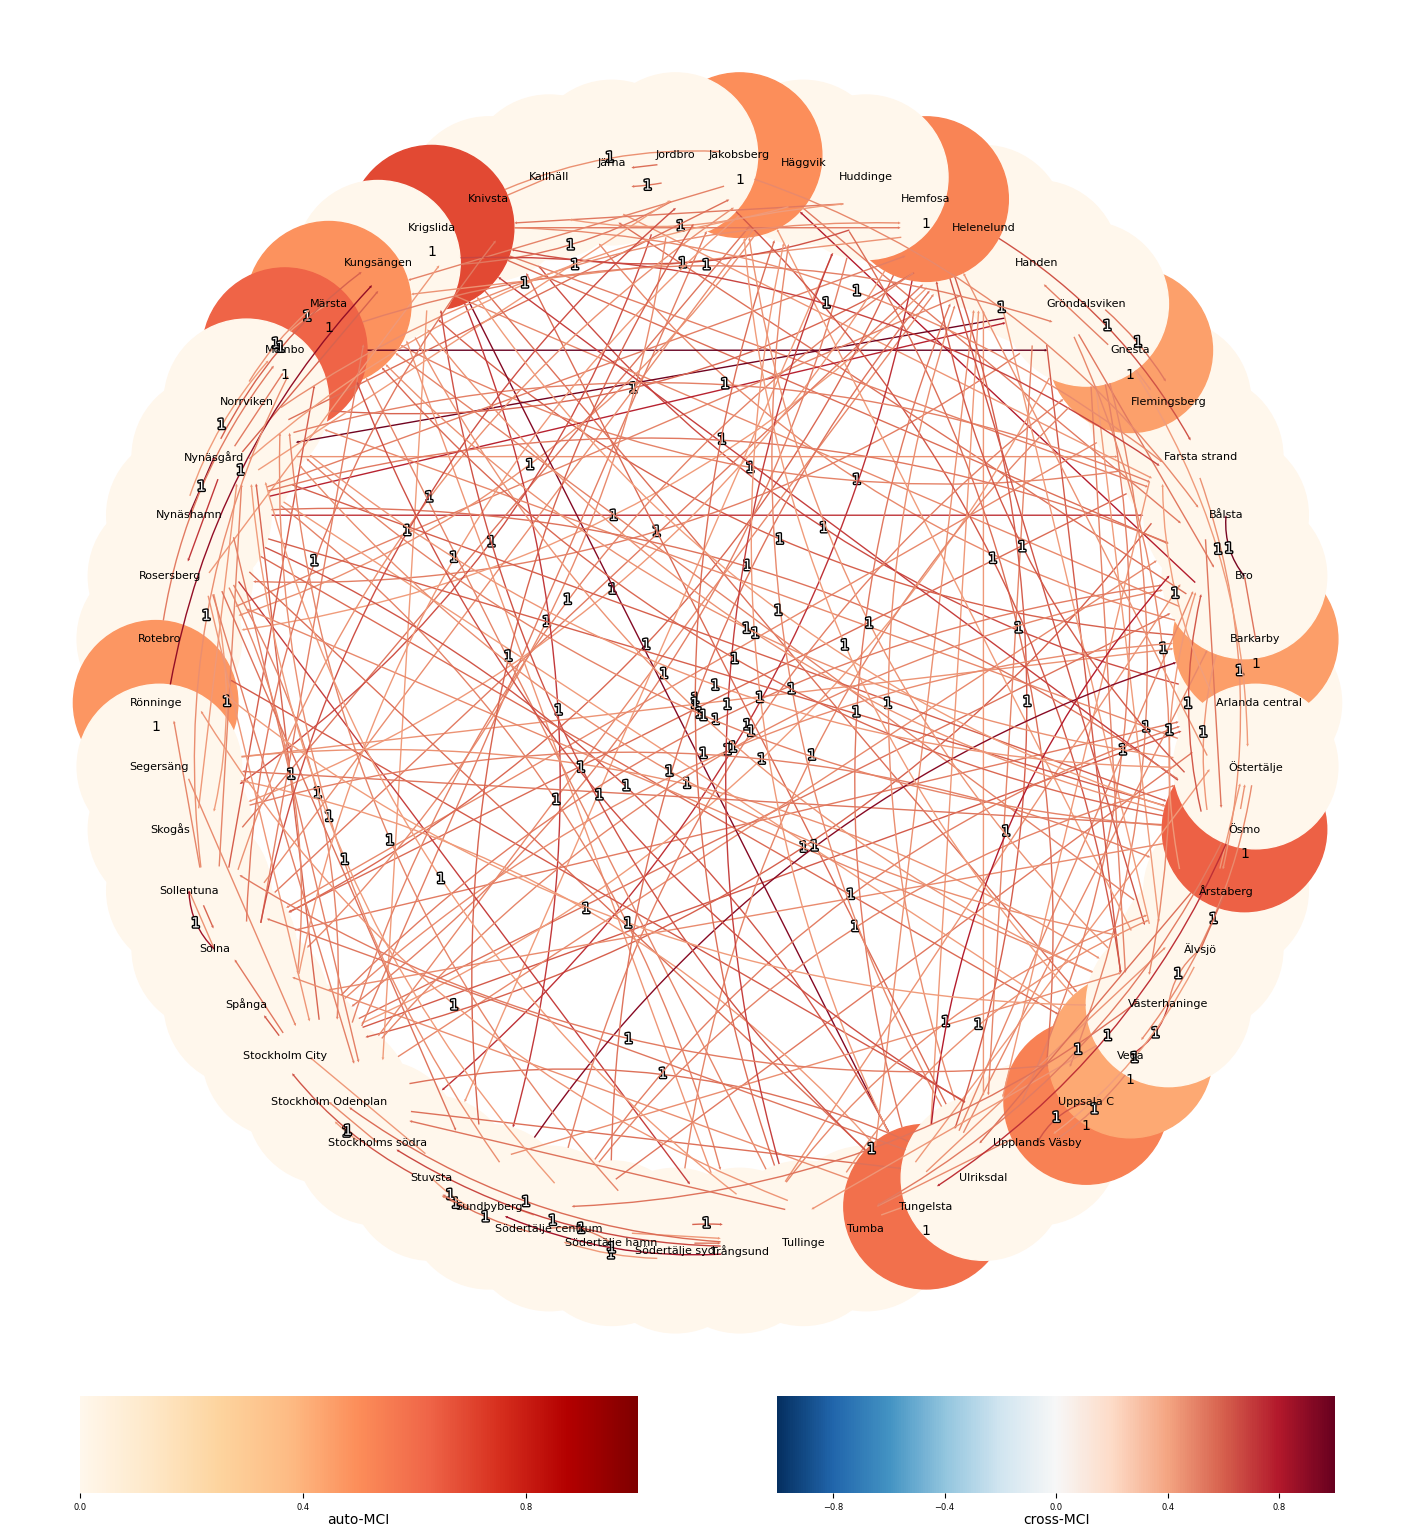

In [ ]:
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(18, 18),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

# 复杂网络分析

研究不同tau的情况下的影响，比如网络层面、影响范围（最长路径长度的变化、从某些核心节点出发的可达节点数）

每个站点t等于几val最高--影响后面几个车次

val最高路径


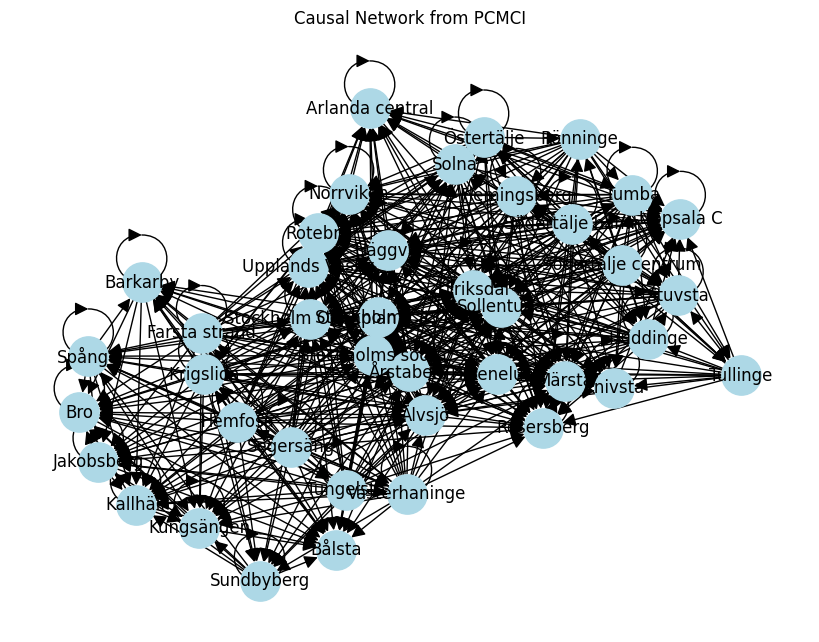

节点个数: 41
节点名称： ['Arlanda central', 'Helenelund', 'Häggvik', 'Norrviken', 'Rotebro', 'Rönninge', 'Sollentuna', 'Solna', 'Stockholm City', 'Stockholm Odenplan', 'Stockholms södra', 'Södertälje centrum', 'Södertälje hamn', 'Tumba', 'Ulriksdal', 'Upplands Väsby', 'Årstaberg', 'Östertälje', 'Barkarby', 'Farsta strand', 'Hemfosa', 'Krigslida', 'Segersäng', 'Spånga', 'Tungelsta', 'Västerhaninge', 'Älvsjö', 'Bro', 'Jakobsberg', 'Kallhäll', 'Kungsängen', 'Sundbyberg', 'Bålsta', 'Flemingsberg', 'Tullinge', 'Huddinge', 'Stuvsta', 'Knivsta', 'Märsta', 'Rosersberg', 'Uppsala C']


In [13]:
# 假设变量名是按顺序排布的
variable_names = var_names  # 填入你的站点名列表
n_vars = len(variable_names)
max_lag = graph.shape[2]  # tau_max + 1

# 创建一个有向图
G = nx.DiGraph()

# 添加因果边：从变量 j (过去时刻 t-τ) 到变量 i (当前时刻 t)
for i in range(n_vars):
    for j in range(n_vars):
        for tau in range(0, max_lag):  # tau=0表示同步，通常不用于因果分析
            if p_matrix_c[i, j, tau]<=alpha:
                # 添加从 j 到 i 的有向边（可以标注 lag 信息）
                G.add_edge(variable_names[j], variable_names[i], lag=tau)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# pos = nx.spring_layout(G, seed=42)  # 或 nx.kamada_kawai_layout(G)
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = G.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(G.nodes()))

In [14]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
bet_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
is_strongly_connected = nx.is_strongly_connected(G)
strongly_connected_components = list(nx.strongly_connected_components(G))


In [15]:
in_degrees = dict(G.in_degree())
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:10]

out_degrees = dict(G.out_degree())
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:10]

betweenness = nx.betweenness_centrality(G)
top_bet = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

pagerank = nx.pagerank(G)  #节点重要性
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# is_strongly_connected = nx.is_strongly_connected(G)
# top_strongly_connected = sorted(is_strongly_connected.items(), key=lambda x: x[1], reverse=True)[:10]

strongly_connected_components = list(nx.strongly_connected_components(G))
top_strongly_connected_components = sorted(strongly_connected_components, key=lambda x: len(x), reverse=True)[:10]

print(top_in)
print(top_out)
print(top_bet)
print(top_closeness)
print(top_pagerank)
print(top_strongly_connected_components)

[('Märsta', 30), ('Rosersberg', 28), ('Rotebro', 26), ('Upplands Väsby', 26), ('Uppsala C', 25), ('Häggvik', 23), ('Norrviken', 23), ('Sollentuna', 23), ('Helenelund', 22), ('Ulriksdal', 21)]
[('Segersäng', 28), ('Södertälje centrum', 27), ('Hemfosa', 27), ('Södertälje hamn', 25), ('Årstaberg', 25), ('Älvsjö', 25), ('Stockholms södra', 24), ('Farsta strand', 24), ('Krigslida', 24), ('Tungelsta', 24)]
[('Stockholms södra', 0.013696484510964148), ('Årstaberg', 0.013696484510964148), ('Stockholm City', 0.012093920408400047), ('Älvsjö', 0.011516858581338218), ('Stockholm Odenplan', 0.010906496720976358), ('Helenelund', 0.0026303284448080826), ('Sollentuna', 0.002093365407845046), ('Ulriksdal', 0.0020711980327364943), ('Häggvik', 0.0016260549405345782), ('Rotebro', 0.001543637358116996)]
[('Märsta', 0.725), ('Rosersberg', 0.6758620689655173), ('Upplands Väsby', 0.628448275862069), ('Rotebro', 0.6259259259259259), ('Uppsala C', 0.625), ('Norrviken', 0.5580357142857143), ('Häggvik', 0.5538461

In [ ]:
def strict_closeness(G, node):
    reachable = nx.descendants(G, node)
    if not reachable:
        return 0.0
    sp_lengths = nx.single_source_shortest_path_length(G, node)
    total_dist = sum(sp_lengths[n] for n in reachable if n != node)
    return len(reachable) / total_dist if total_dist > 0 else 0.0

print("Strict closeness:", strict_closeness(G, "Arlanda central"))

Strict closeness: 0.0


In [ ]:
print("In-degree of Arlanda central:", G.in_degree("Arlanda central"))
print("Out-degree of Arlanda central:", G.out_degree("Arlanda central"))
print("closeness:", nx.closeness_centrality(G)["Arlanda central"])
print(G.is_directed())
reachable = nx.descendants(G, "Arlanda central")
print("Reachable from Arlanda central:", reachable)
print("Is strongly connected?", nx.is_strongly_connected(G))

In-degree of Arlanda central: 11
Out-degree of Arlanda central: 0
closeness: 0.3408018867924528
True
Reachable from Arlanda central: set()
Is strongly connected? False


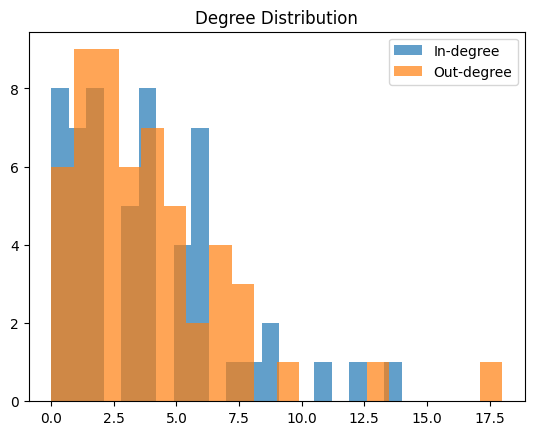

In [ ]:
import matplotlib.pyplot as plt

plt.hist(in_degrees.values(), bins=20, alpha=0.7, label="In-degree")
plt.hist(out_degrees.values(), bins=20, alpha=0.7, label="Out-degree")
plt.legend()
plt.title("Degree Distribution")
plt.show()

In [ ]:
pagerank = nx.pagerank(G, alpha=0.85)
print(sorted(pagerank, key=lambda x: pagerank[x], reverse=True))

['Märsta', 'Gnesta', 'Uppsala C', 'Arlanda central', 'Bålsta', 'Kungsängen', 'Upplands Väsby', 'Stockholm Odenplan', 'Spånga', 'Mölnbo', 'Rotebro', 'Helenelund', 'Norrviken', 'Vega', 'Knivsta', 'Bro', 'Kallhäll', 'Jakobsberg', 'Sollentuna', 'Häggvik', 'Ulriksdal', 'Skogås', 'Solna', 'Älvsjö', 'Årstaberg', 'Barkarby', 'Rosersberg', 'Krigslida', 'Stockholms södra', 'Tungelsta', 'Stuvsta', 'Jordbro', 'Hemfosa', 'Tullinge', 'Farsta strand', 'Ösmo', 'Stockholm City', 'Sundbyberg', 'Rönninge', 'Flemingsberg', 'Västerhaninge', 'Trångsund', 'Huddinge', 'Segersäng', 'Nynäsgård', 'Gröndalsviken', 'Södertälje centrum', 'Södertälje hamn', 'Tumba', 'Handen', 'Nynäshamn', 'Järna', 'Södertälje syd', 'Östertälje']


In [ ]:
# 存储每个节点的最长因果路径长度
longest_paths = []

for node in G.nodes:
    paths = nx.single_source_shortest_path_length(G, node)
    if len(paths) > 1:
        # 排除只有自身可达的情况（只有它自己）
        longest = max(paths.values())
    else:
        longest = 0  # 没有可达节点
    longest_paths.append(longest)

# 计算平均最长路径长度
average_longest_path = sum(longest_paths) / len(longest_paths)

print("Average of longest causal path lengths:", average_longest_path)

Average of longest causal path lengths: 2.185185185185185


# 数多少tau

定义函数

## 函数

In [ ]:
def counttau(tau_input, dataframe, var_name):

    gpdc = GPDC()
    pcmci = PCMCI(
        dataframe=dataframe,
        cond_ind_test=gpdc,
        verbosity=0
    )

    tau_max = tau_input
    results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None, alpha_level=0.05)

    p_matrix = results['p_matrix']
    val_matrix = results['val_matrix']
    num_vars = p_matrix.shape[0]
    tau_max_plus1 = p_matrix.shape[2]

    def compute_counts_strengths(alpha):
        count = [0] * tau_max_plus1
        strength_sum = [0.0] * tau_max_plus1
        strength_count = [0] * tau_max_plus1

        for i in range(num_vars):
            for j in range(num_vars):
                for tau in range(tau_max_plus1):
                    pval = p_matrix[i, j, tau]
                    val = val_matrix[i, j, tau]
                    if pval <= alpha and is_later_station(train_paths, var_name[j], var_name[i]):
                        count[tau] += 1
                        strength_sum[tau] += abs(val)
                        strength_count[tau] += 1

        strength_avg = [
            strength_sum[i] / strength_count[i] if strength_count[i] > 0 else 0.0
            for i in range(tau_max_plus1)
        ]

        return count, strength_avg

    count_005, strength_005 = compute_counts_strengths(alpha=0.05)
    count_001, strength_001 = compute_counts_strengths(alpha=0.01)

    return {
        'alpha_0.05': {
            'count_per_tau': count_005,
            'strength_per_tau': strength_005
        },
        'alpha_0.01': {
            'count_per_tau': count_001,
            'strength_per_tau': strength_001
        }
    }

## 折叠

In [ ]:
count1=counttau(1,dataframe,df_delay.columns)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.

In [ ]:
print(count1)

{'alpha_0.05': {'count_per_tau': [114, 112], 'strength_per_tau': [np.float64(0.5273331208594858), np.float64(0.5025227888149397)]}, 'alpha_0.01': {'count_per_tau': [51, 34], 'strength_per_tau': [np.float64(0.6087348961171717), np.float64(0.5957162705079512)]}}


In [ ]:
var_names = df_delay.columns
count1=counttau(1,dataframe,var_names)
count2=counttau(2,dataframe,var_names)
count3=counttau(3,dataframe,var_names)
count4=counttau(4,dataframe,var_names)
count5=counttau(5,dataframe,var_names)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.

## 输出结果

In [ ]:
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

{'alpha_0.05': {'count_per_tau': [114, 112], 'strength_per_tau': [np.float64(0.5273331208594858), np.float64(0.5025227888149397)]}, 'alpha_0.01': {'count_per_tau': [51, 34], 'strength_per_tau': [np.float64(0.6087348961171717), np.float64(0.5957162705079512)]}}
{'alpha_0.05': {'count_per_tau': [102, 98, 76], 'strength_per_tau': [np.float64(0.5357698193186624), np.float64(0.530421043391164), np.float64(0.5204370130655382)]}, 'alpha_0.01': {'count_per_tau': [47, 41, 31], 'strength_per_tau': [np.float64(0.6006864234168907), np.float64(0.6026131643095484), np.float64(0.5766496948705556)]}}
{'alpha_0.05': {'count_per_tau': [128, 128, 128, 130], 'strength_per_tau': [np.float64(0.5475131091385678), np.float64(0.5236492289956491), np.float64(0.5254334410673853), np.float64(0.5487840235118123)]}, 'alpha_0.01': {'count_per_tau': [45, 28, 32, 47], 'strength_per_tau': [np.float64(0.6456573099371569), np.float64(0.627349640857595), np.float64(0.6309177373761029), np.float64(0.641258406726102)]}}
{'a

In [ ]:
count6=counttau(6,dataframe)
count7=counttau(7,dataframe)
count8=counttau(8,dataframe)
count9=counttau(9,dataframe)
count10=counttau(10,dataframe)

In [ ]:
print(count6)
print(count7)
print(count8)
print(count9)
print(count10)